In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

In [2]:
pwd

'C:\\Users\\rohit\\Desktop\\titanic data set'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
full = pd.concat([train,test]).reset_index(drop=True)

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [9]:
full.shape

(1309, 12)

In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

In [12]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [13]:
full.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [15]:
total = full.isnull().sum().sort_values(ascending = False)
percent = round(full.isnull().sum().sort_values(ascending  = False)/len(full)*100,2)
pd.concat([total,percent], axis =1,keys =['Total','Percent'])

,Total,Percent
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08
Ticket,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00


In [16]:
#There are around 1014 missing values in Cabin that counts to 78 percent. 
#SUrvived has missing values in test. 
#Age has around 20 percent missing values
#Embarked and Fare has 2 and 1 missing values


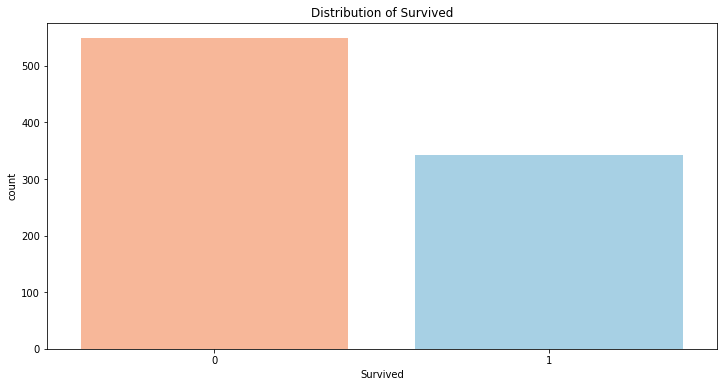

In [17]:
#Distirbution of dependent variable
fig,ax = plt.subplots(figsize=(12,6))
ax.set_title('Distribution of Survived')
sns.countplot(train['Survived'],ax = ax, palette = 'RdBu',saturation = 1)

In [18]:
#There are more non survived than survived people
#The distribution is imbalanced but not much 
#No need of balancing

In [19]:
#Let us try to clean the data and impute missing values
#First let us try to impute fare and Embarked as they have less missing values


In [20]:
#Fare usually depends on Embarked and Pclass

In [21]:
full[full['Fare'].isna()]
#Embarked in S and Passenger Class 3
# Let us check other values with similar columns

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [22]:
full[(full['Embarked'] =='S') & (full['Pclass']==3)&(full['SibSp']==0)&(full['Parch']==0)]
##Everyone who embarked at S Pclass 3 and who dont have Siblings SPouse and Parent child in Ship have almost similar fares
#Slight variation in fares might probably be due to the time when they took the ticket.
# So let us impute the missing Fare with the mean of these values


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
12,20.0,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,male,0,0.0,A/5. 2151
14,14.0,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
37,21.0,NaN,S,8.0500,"Cann, Mr. Ernest Charles",0,38,3,male,0,0.0,A./5. 2152
45,NaN,NaN,S,8.0500,"Rogers, Mr. William John",0,46,3,male,0,0.0,S.C./A.4. 23567
51,21.0,NaN,S,7.8000,"Nosworthy, Mr. Richard Cater",0,52,3,male,0,0.0,A/4. 39886
67,19.0,NaN,S,8.1583,"Crease, Mr. Ernest James",0,68,3,male,0,0.0,S.P. 3464
74,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,75,3,male,0,1.0,1601


In [23]:
full['Fare'].fillna(full[(full['Embarked'] =='S') & (full['Pclass']==3)&(full['SibSp']==0)&(full['Parch']==0)]['Fare'].mean(), inplace=True)

In [24]:
full['Fare'].isna().sum()

0

In [25]:
# Now let us try to impute Embarked based on Fare and PClass
full[full['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


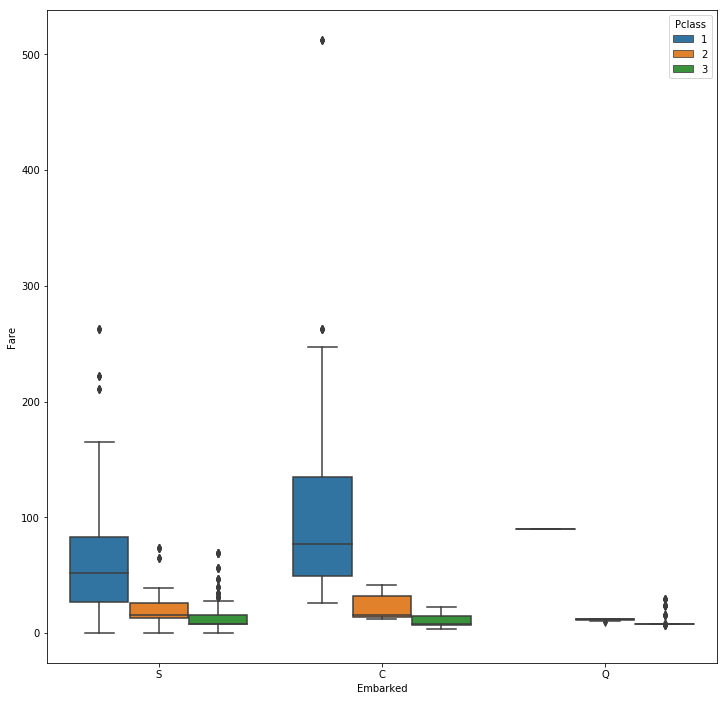

In [26]:
#Both belong to Pclass =1 Cabin B and Fare 80. 
#Let us plot and check if we can impute based on this
fig, ax = plt.subplots(figsize = (12,12))
sns.boxplot(x = 'Embarked', y ='Fare', hue ='Pclass', data = full, ax = ax)


In [29]:
# pCLASS 1 HAS FARE 80 IN EMBARKED C 
# LET US IMPUTE WITH IT
full['Embarked'].fillna('C',inplace=True)

In [30]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [31]:
#Cabin information
#Let us create a new column Cabin Class
def CabinClass(f):
    if pd.isnull(f):
        pass
    else:
        for items in f:
            return items[0]

    

In [32]:
full['CabinClass'] = full['Cabin'].apply(CabinClass)

In [33]:
full.drop(columns =['Cabin'], axis =1,inplace=True)


In [34]:
full['CabinClass'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: CabinClass, dtype: int64

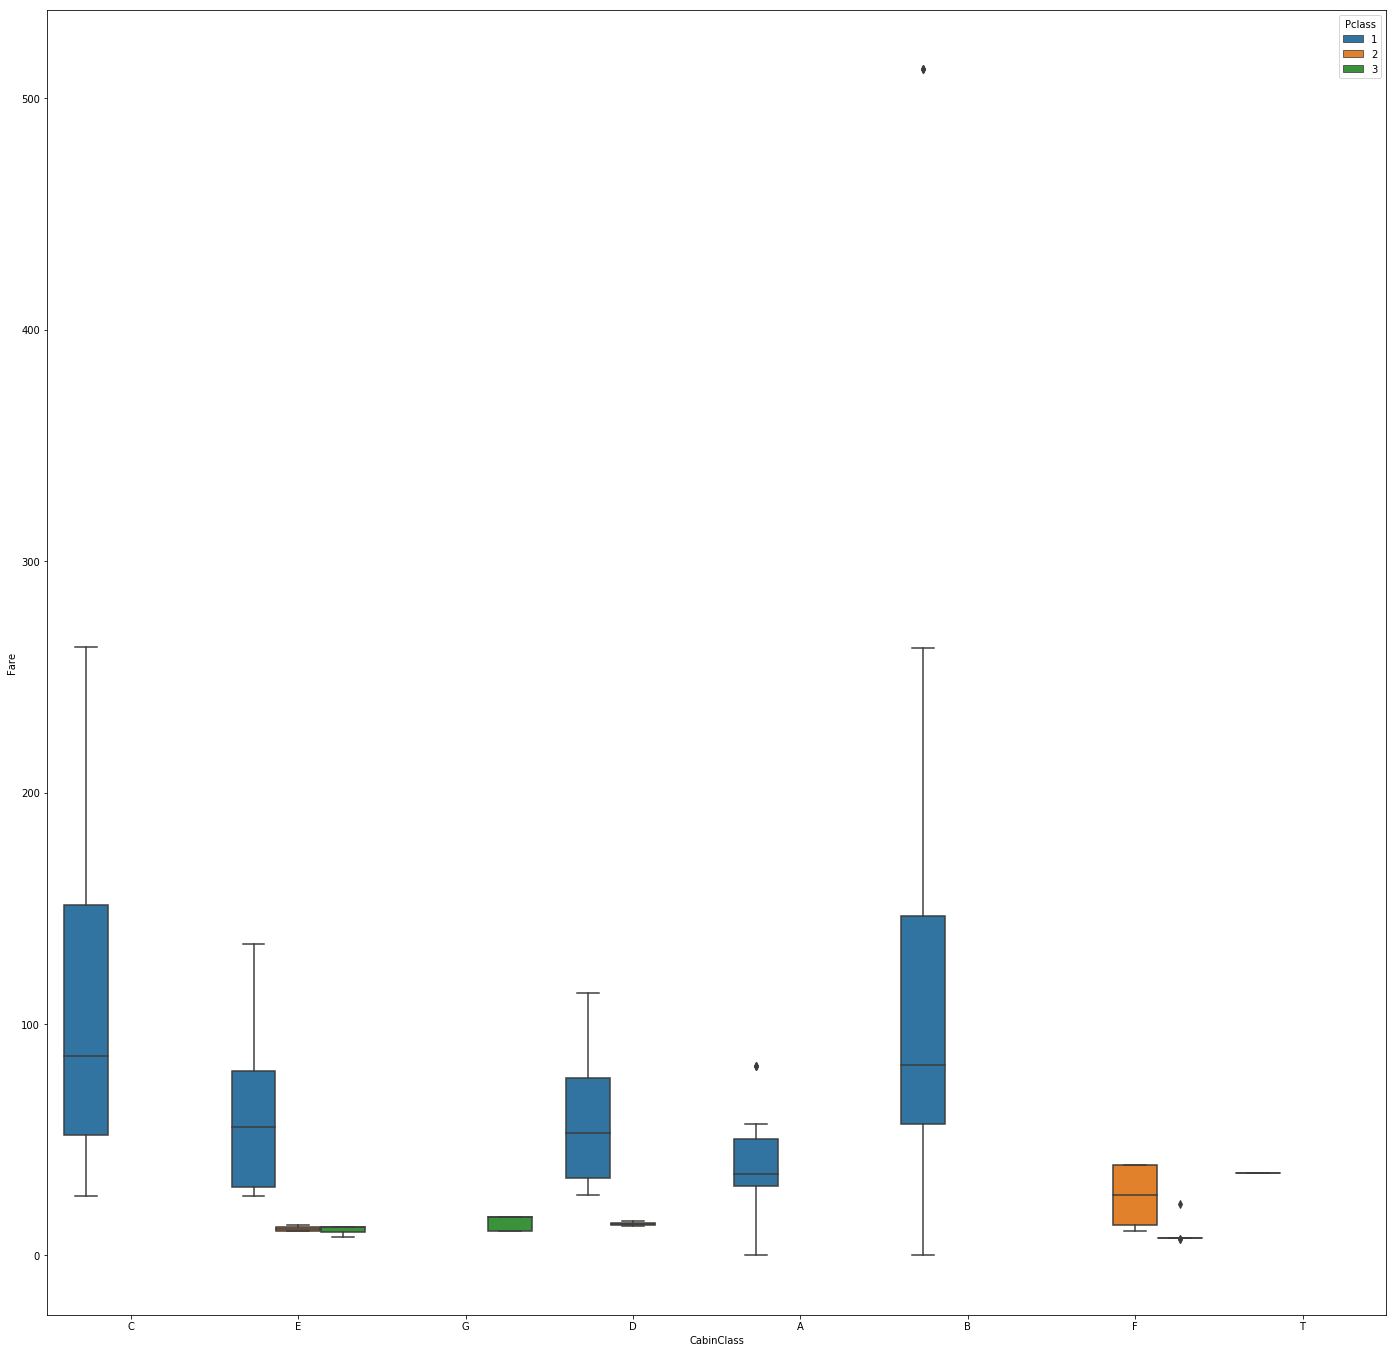

In [35]:
fig,ax = plt.subplots(figsize =(24,24))
sns.boxplot(x ='CabinClass', y ='Fare',hue ='Pclass', data =full, ax =ax)

In [36]:
full.groupby(by = 'CabinClass')['Pclass'].nunique()
##CabinClass A B C G T belong to P class 1, E has all the 3 classes, D has 1 and 2classes

CabinClass
A    1
B    1
C    1
D    2
E    3
F    2
G    1
T    1
Name: Pclass, dtype: int64

In [37]:
full.sort_values(by = 'Ticket')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinClass
504,16.0,S,86.5000,"Maioni, Miss. Roberta",0,505,1,female,0,1.0,110152,B
257,30.0,S,86.5000,"Cherry, Miss. Gladys",0,258,1,female,0,1.0,110152,B
759,33.0,S,86.5000,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,760,1,female,0,1.0,110152,B
585,18.0,S,79.6500,"Taussig, Miss. Ruth",2,586,1,female,0,1.0,110413,E
262,52.0,S,79.6500,"Taussig, Mr. Emil",1,263,1,male,1,0.0,110413,E
558,39.0,S,79.6500,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,559,1,female,1,1.0,110413,E
110,47.0,S,52.0000,"Porter, Mr. Walter Chamberlain",0,111,1,male,0,0.0,110465,C
475,NaN,S,52.0000,"Clifford, Mr. George Quincy",0,476,1,male,0,0.0,110465,A
1226,30.0,S,26.0000,"Maguire, Mr. John Edward",0,1227,1,male,0,NaN,110469,C
1049,42.0,S,26.5500,"Borebank, Mr. John James",0,1050,1,male,0,NaN,110489,D


In [38]:
full['FamilySize'] = full['SibSp']+full['Parch']+1

In [39]:
 full.drop(columns = ['SibSp','Parch'], axis =1,inplace=True)

In [40]:
#Let us try to combine people with same ticket number into group. 
#They might belong to same family or might come together
full['Group'] =full.groupby('Ticket')['Ticket'].transform('count')

In [41]:
full['CabinClass'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: CabinClass, dtype: int64

In [42]:
full['Fare'] = full['Fare']/full['Group']

In [43]:
full[(full['Embarked']=='S')&(full['Pclass']==1)&(full['CabinClass']=='B')]['Fare'].min()

0.0

In [44]:
##let us drop Cabin Class
full.drop(columns =['CabinClass'],axis =1,inplace=True)

In [45]:
full.isna().sum()

Age            263
Embarked         0
Fare             0
Name             0
PassengerId      0
Pclass           0
Sex              0
Survived       418
Ticket           0
FamilySize       0
Group            0
dtype: int64

In [46]:
full.groupby(by = 'Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [47]:
##Let us impute Age column based on Passenger Class

In [48]:
def AgeImpute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 39
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [49]:
full['Age'] = full[['Age','Pclass']].apply(AgeImpute,axis=1)

In [50]:
full.isna().sum()

Age              0
Embarked         0
Fare             0
Name             0
PassengerId      0
Pclass           0
Sex              0
Survived       418
Ticket           0
FamilySize       0
Group            0
dtype: int64

C:\Users\rohit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Percentage of Survived across Gender')

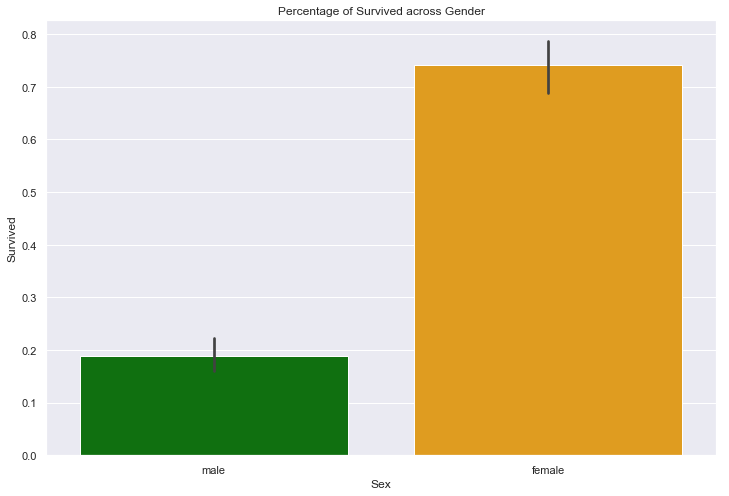

In [51]:
#Gender Analysis
pal = {'male':'green','female':'orange'}
sns.set(style ='darkgrid')
fig,ax = plt.subplots(figsize =(12,8))
sns.barplot(x ='Sex', y ='Survived', data=full, palette = pal, ax =ax)
ax.set_title('Percentage of Survived across Gender')

In [52]:
#There are only 20 percent of male Survived and around 75 percent female survived. Preference is given to children and female to save


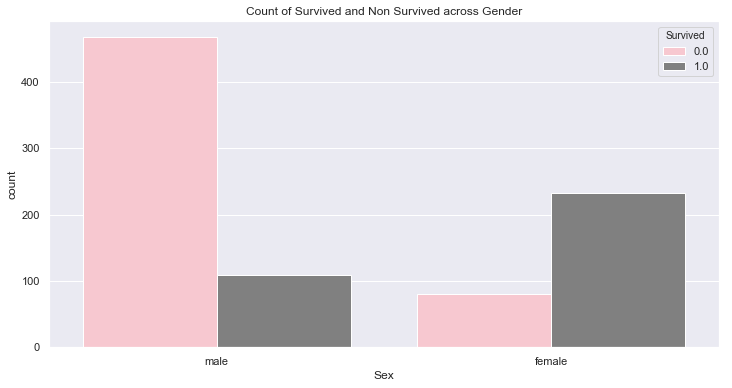

In [53]:
pal = {1:'grey',0:'pink'}
fig,ax = plt.subplots(figsize =(12,6))
ax.set_title('Count of Survived and Non Survived across Gender')
sns.countplot(x ='Sex', hue ='Survived',data =full, palette =pal, ax =ax)

[[Text(0, 0, 'High'), Text(0, 0, 'Middle'), Text(0, 0, 'Low')]]

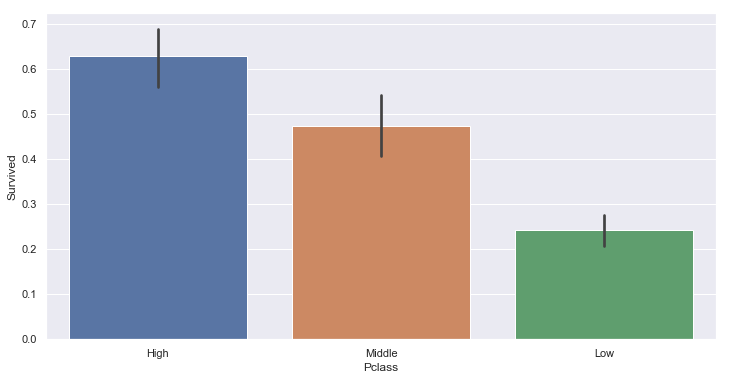

In [54]:
#Class distribution of Survivors
fig,ax = plt.subplots(figsize = (12,6))
g = sns.barplot(x = 'Pclass', y ='Survived', data=full,ax = ax)
g.set(xticklabels = ['High','Middle','Low'])

In [55]:
full.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,FamilySize,Group
0,22.0,S,7.25000,"Braund, Mr. Owen Harris",1,3,male,0.0,A/5 21171,2,1
1,38.0,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,1.0,PC 17599,2,2
2,26.0,S,7.92500,"Heikkinen, Miss. Laina",3,3,female,1.0,STON/O2. 3101282,1,1
3,35.0,S,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,1.0,113803,2,2
4,35.0,S,8.05000,"Allen, Mr. William Henry",5,3,male,0.0,373450,1,1


In [56]:
full.sort_values(by ='Ticket')

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,FamilySize,Group
504,16.0,S,28.833333,"Maioni, Miss. Roberta",505,1,female,1.0,110152,1,3
257,30.0,S,28.833333,"Cherry, Miss. Gladys",258,1,female,1.0,110152,1,3
759,33.0,S,28.833333,"Rothes, the Countess. of (Lucy Noel Martha Dye...",760,1,female,1.0,110152,1,3
585,18.0,S,26.550000,"Taussig, Miss. Ruth",586,1,female,1.0,110413,3,3
262,52.0,S,26.550000,"Taussig, Mr. Emil",263,1,male,0.0,110413,3,3
558,39.0,S,26.550000,"Taussig, Mrs. Emil (Tillie Mandelbaum)",559,1,female,1.0,110413,3,3
110,47.0,S,26.000000,"Porter, Mr. Walter Chamberlain",111,1,male,0.0,110465,1,2
475,39.0,S,26.000000,"Clifford, Mr. George Quincy",476,1,male,0.0,110465,1,2
1226,30.0,S,26.000000,"Maguire, Mr. John Edward",1227,1,male,NaN,110469,1,1
1049,42.0,S,26.550000,"Borebank, Mr. John James",1050,1,male,NaN,110489,1,1


In [57]:
#Now let us try to make them into groups based on gender and age
#Age less than 10 as children
#Age greater than 60 as old
#Let us try to make groups into big medium and small


In [58]:
def family(family):
    if family<=3:
        return 'Small'
    elif (family<=5) and (family>3):
        return 'Medium'
    else:
        return 'Big'


In [59]:
full['Family']  = full['FamilySize'].apply(family)

In [60]:
def GenderGroup(df):
    Gender = df[0]
    Age = df[1]
    if Gender == 'male':
        if Age <=15:
            return 'Boy'
        elif Age>15 and Age<=60:
            return 'Man'
        else:
            return 'Old Man'
    else:
        if Age <=15:
            return 'Girl'
        elif Age>15 and Age<=60:
            return 'Woman'
        else:
            return 'Old Lady'

In [61]:
full['Category'] = full[['Sex','Age']].apply(GenderGroup, axis =1)

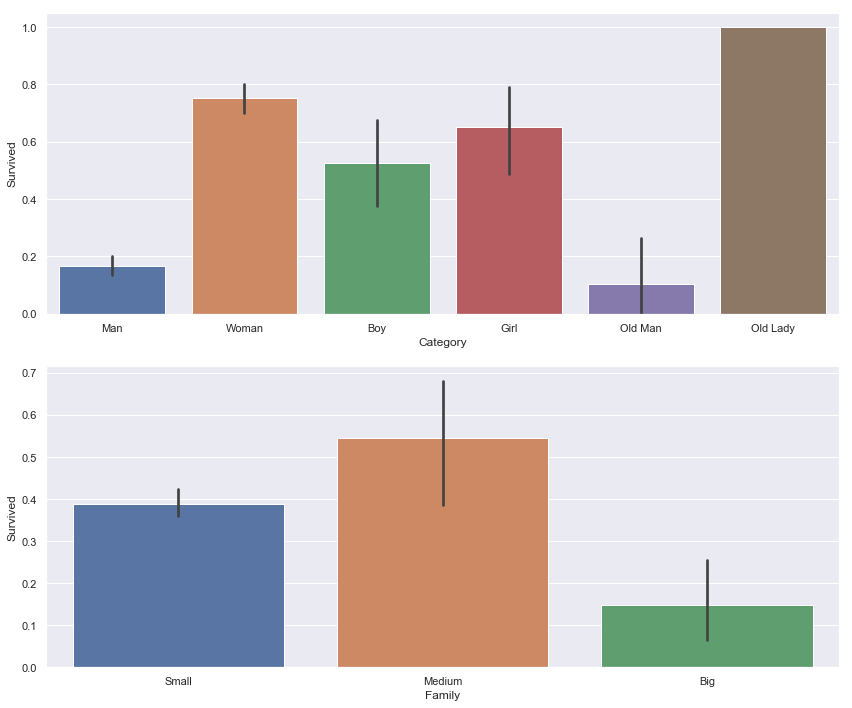

In [62]:
fig, ax = plt.subplots(nrows =2, figsize =(12,10))
sns.barplot(x= 'Category',y='Survived', data =full,ax =ax[0])
sns.barplot(x ='Family', y ='Survived', data =full,ax = ax[1])
plt.tight_layout()

In [63]:
#As we can see Men and Old Men have less survivors than others . This might be because children and women are given preference 
#in rescuing
#Medium families have more survivors while Big Families have less survivors


In [75]:
#Name column
full['Title'] = full['Name'].apply(lambda x: x.split(sep =', ')[1].split(sep ='.')[0])


In [76]:
full['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
         ...  
1279        Mr
1280    Master
1281        Mr
1282       Mrs
1283    Master
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288       Mrs
1289        Mr
1290        Mr
1291      Miss
1292        Mr
1293      Miss
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299      Miss
1300      Miss
1301      Miss
1302       Mrs
1303      Miss
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [77]:
full['Title'].value_counts()


Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Dona              1
the Countess      1
Lady              1
Capt              1
Jonkheer          1
Don               1
Sir               1
Mme               1
Name: Title, dtype: int64

In [92]:
def title_imp(Title):
    rank = ['Rev','Dr','Col','Major','Capt','Sir','Jonkheer','Don','the Countess','Lady']
    Mrs = ['Mrs','Ms','Mlle','Mme']
    if (Title in rank):
        return 'Rank'
    elif (Title in Mrs):
        return 'Mrs'
    else:
        return Title

In [88]:
full['Title'][0]

'Mr'

In [93]:
full['Title'] = full['Title'].apply(title_imp)

In [94]:
full['Title'].value_counts()

Mr        757
Miss      260
Mrs       202
Master     61
Rank       29
Name: Title, dtype: int64

Text(0.5, 1.0, 'Survival percentage based on Title')

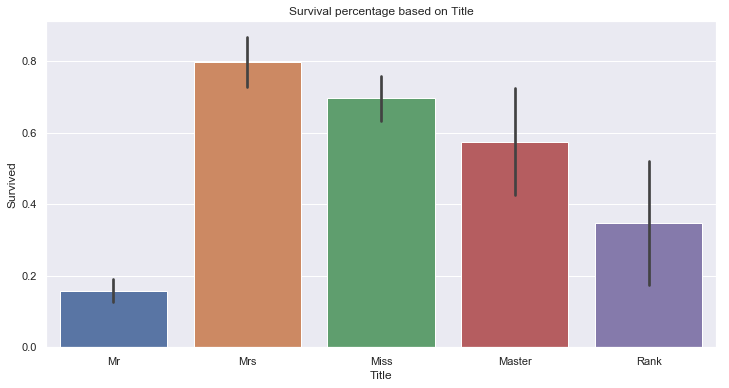

In [96]:
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(x = 'Title',y = 'Survived', data =full, ax = ax)
ax.set_title('Survival percentage based on Title')

In [82]:
full.drop(columns = ['Name'], axis=1,inplace=True)

In [83]:
full.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,FamilySize,Group,Family,Category,Title
0,22.0,S,7.25000,1,3,male,0.0,A/5 21171,2,1,Small,Man,Mr
1,38.0,C,35.64165,2,1,female,1.0,PC 17599,2,2,Small,Woman,Mrs
2,26.0,S,7.92500,3,3,female,1.0,STON/O2. 3101282,1,1,Small,Woman,Miss
3,35.0,S,26.55000,4,1,female,1.0,113803,2,2,Small,Woman,Mrs
4,35.0,S,8.05000,5,3,male,0.0,373450,1,1,Small,Man,Mr


In [97]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
on = OneHotEncoder()
cols= full.select_dtypes(include = ['object']).columns

In [98]:
full[cols]=full[cols].apply(le.fit_transform)

In [99]:
train = full[full['Survived'].notnull()]
test = full[full['Survived'].isnull()]

In [100]:
train.columns

Index(['Age', 'Embarked', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Ticket', 'FamilySize', 'Group', 'Family', 'Category', 'Title'],
      dtype='object')

In [118]:
X_train = train[['Age', 'Embarked', 'Fare', 'PassengerId', 'Pclass', 'Sex','Ticket', 'FamilySize', 'Group', 'Family', 'Category', 'Title']]
y_train = train['Survived']
X_test = test[['Age', 'Embarked', 'Fare', 'PassengerId', 'Pclass', 'Sex','Ticket', 'FamilySize', 'Group', 'Family', 'Category', 'Title']]
y_test = test['Survived']

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
import statsmodels.api as sm

In [111]:
lr = LogisticRegression()

In [112]:
model = lr.fit(X_train,y_train)

In [113]:
predictions = model.predict(X_test)

In [114]:
predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [115]:
from sklearn.metrics import roc_curve, auc

In [116]:
y_score = model.decision_function(X_test)

In [121]:
y_score

array([-2.15720228, -0.39802824, -2.03835833, -2.01095276,  0.83183514,
       -1.90868115,  0.77331629, -0.6754508 ,  1.06040113, -1.70590679,
       -2.02831541, -1.00771972,  3.14453031, -1.95172347,  1.47582373,
        1.47682952, -1.12607174, -1.48943295,  0.42756994,  0.09714013,
       -0.87600012, -1.43771665,  1.67367475,  0.32584705,  1.33775696,
       -2.92900021,  3.69214618, -1.54357859, -0.22556944, -1.18525718,
       -2.12726136, -1.01203049, -0.97240494, -0.78126357,  0.54559139,
       -1.3905366 ,  0.84472638,  1.00442135, -1.95893399, -1.01552967,
       -2.12422622, -0.24589321, -2.89933451,  1.33855385,  2.13233957,
       -2.36982907, -0.70755213, -1.99035089,  2.03968946,  0.10526685,
        0.49679259, -1.20517959,  0.89124035,  1.41363733, -1.25151336,
       -3.12189847, -2.405532  , -2.03835802, -1.94967881,  3.15319116,
       -1.78304748, -1.13514454, -1.78181386,  1.06315422,  0.40214181,
        0.94442543,  1.21099461, -0.53558697,  0.21564731, -0.05

In [122]:
FPR,TPR,_ = roc_curve(predictions,y_score) 

In [123]:
ROC_AUC = auc(FPR,TPR)

In [124]:
print(ROC_AUC)

1.0


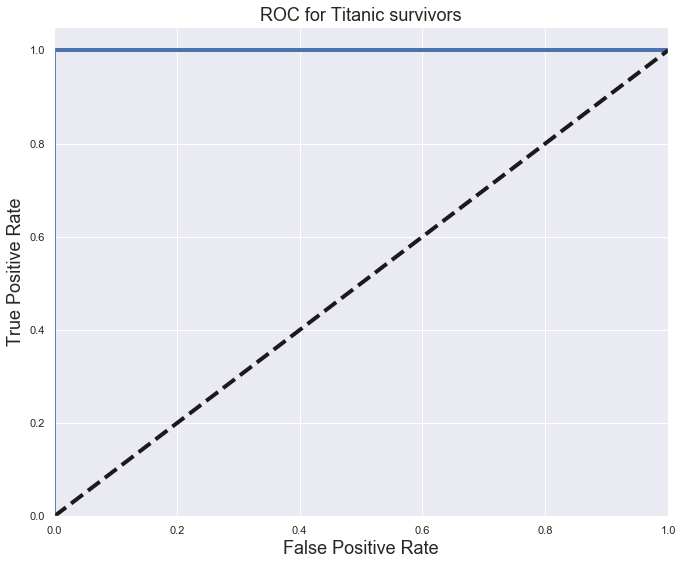

In [125]:
plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dr = DecisionTreeClassifier()

In [97]:
drmodel = dr.fit(X_train, y_train)

In [104]:
predictionsdr = drmodel.predict(X_test)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier()

In [102]:
modelrf = rf.fit(X_train, y_train)

In [105]:
predictionsrf = modelrf.predict(X_test)

In [118]:
from sklearn.svm import SVC
svc = SVC()

In [119]:
modelsvm = svc.fit(X_train, y_train)

In [120]:
predictionssvm = modelsvm.predict(X_test)

In [121]:
predictionssvm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.